In [ ]:
# Cell 1: Setup environment + Title Banner
!pip install qiskit qiskit-ibm-runtime pylatexenc scipy numpy matplotlib --quiet

import matplotlib.pyplot as plt

def banner(text, fname="banner.png"):
    plt.figure(figsize=(10,2))
    plt.text(0.5,0.5, text, ha="center", va="center",
             fontsize=24, fontweight="bold", family="monospace")
    plt.axis("off")
    plt.savefig(fname, dpi=200, bbox_inches="tight")
    plt.close()
    return fname

# Generate title banner
banner("Quantum-Blockchain Healthcare Simulation Ready")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.0 MB/s eta 0:00:00


'banner.png'

In [ ]:
# Cell 2: QKD key generation visualization

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

# Parameters
BIT_NUM = 20
rng = np.random.default_rng()

# Step 1: Generate Alice’s random bits and bases
abits = rng.integers(0,2, size=BIT_NUM)
abase = rng.integers(0,2, size=BIT_NUM)

# Step 2: Alice prepares qubits
qc = QuantumCircuit(BIT_NUM, BIT_NUM)
for n in range(BIT_NUM):
    if abits[n] == 0:
        if abase[n] == 1:
            qc.h(n)
    if abits[n] == 1:
        if abase[n] == 0:
            qc.x(n)
        else:
            qc.x(n); qc.h(n)
qc.barrier()

# Step 3: Bob’s random bases
bbase = rng.integers(0,2, size=BIT_NUM)
for m in range(BIT_NUM):
    if bbase[m] == 1:
        qc.h(m)
    qc.measure(m, m)

# --- Helper: Save text as styled image ---
def text_image(lines, fname="output.png", fontsize=12):
    plt.figure(figsize=(10,0.5+0.3*len(lines)))
    for i, line in enumerate(lines[::-1]):  # print from top
        plt.text(0.01, 0.05+i*0.15, line, fontsize=fontsize,
                 family="monospace", va="bottom", ha="left")
    plt.axis("off")
    plt.savefig(fname, dpi=200, bbox_inches="tight")
    plt.close()
    return fname

# Save outputs as images
text_lines = [
    f"Alice's bits:  {abits.tolist()}",
    f"Alice's bases: {abase.tolist()}",
    f"Bob's bases:   {bbase.tolist()}",
]
text_image(text_lines, "qkd_bits_bases.png")

# Visualize random bases for Alice & Bob
fig, ax = plt.subplots(2,1, figsize=(12,4), sharex=True)
ax[0].bar(range(BIT_NUM), abase, color="royalblue")
ax[0].set_title("Alice’s Bases (0=Z, 1=X)")
ax[1].bar(range(BIT_NUM), bbase, color="darkorange")
ax[1].set_title("Bob’s Bases (0=Z, 1=X)")
plt.savefig("qkd_bases_chart.png", dpi=200, bbox_inches="tight")
plt.close()

# Save quantum circuit diagram
qc.draw("mpl", filename="qkd_circuit.png")

print("✅ Generated images:")
print("- qkd_bits_bases.png (text output as image)")
print("- qkd_bases_chart.png (bar chart)")
print("- qkd_circuit.png (circuit diagram)")


✅ Generated images:
- qkd_bits_bases.png (text output as image)
- qkd_bases_chart.png (bar chart)
- qkd_circuit.png (circuit diagram)


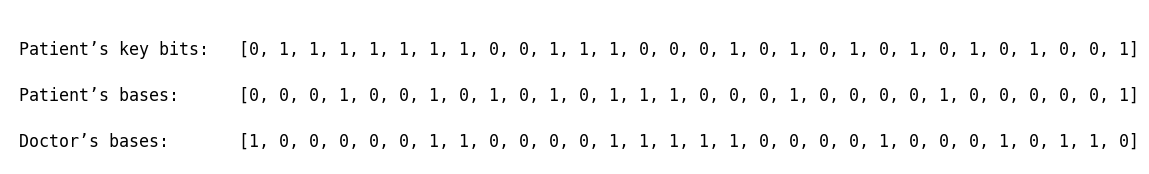

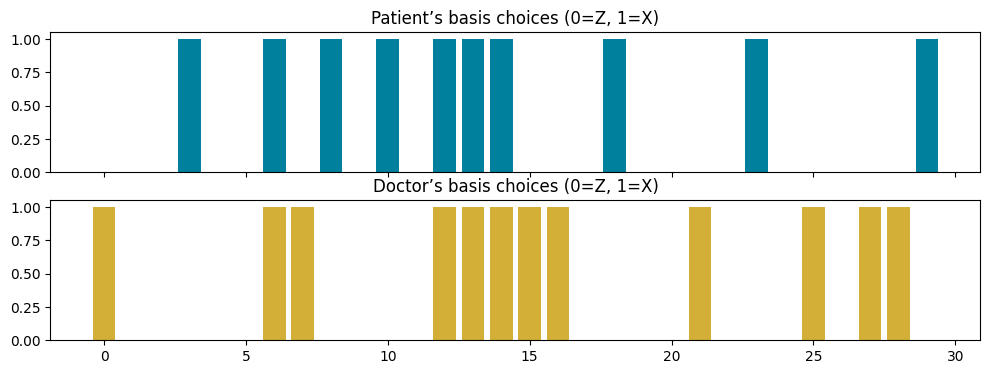

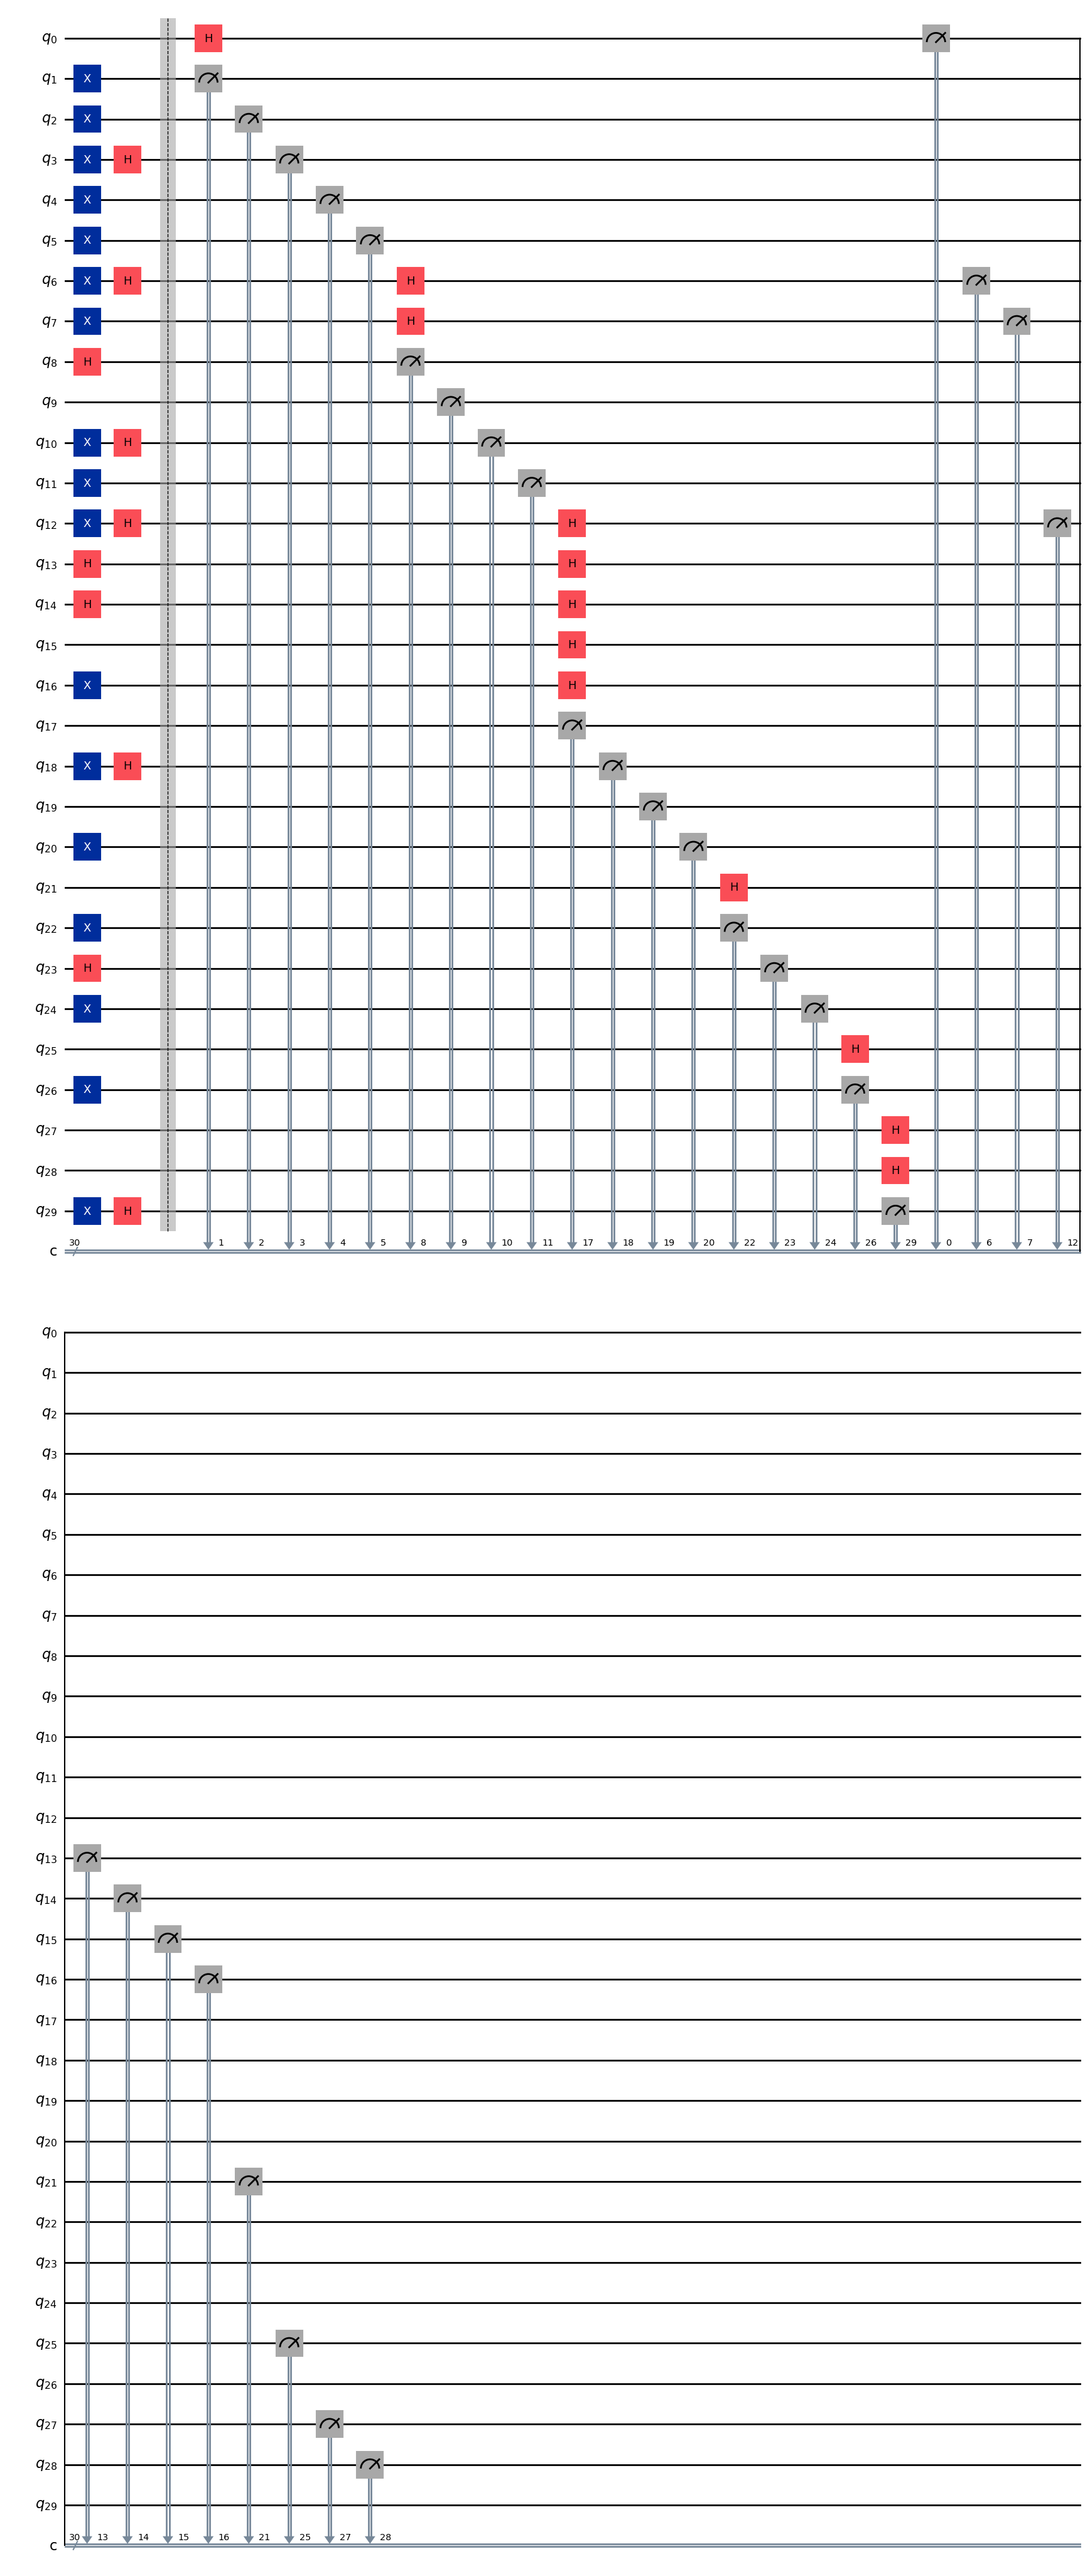

In [ ]:
# Cell 2: QKD demo with Patient–Doctor roles (BB84 style, healthcare context)

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

# ---- Configuration ----
N_QUBITS = 30
rng = np.random.default_rng()

# ---- Patient: prepares quantum states ----
patient_bits  = rng.integers(0, 2, size=N_QUBITS)    # random raw key
patient_bases = rng.integers(0, 2, size=N_QUBITS)    # 0 = Z-basis, 1 = X-basis

circuit = QuantumCircuit(N_QUBITS, N_QUBITS)
for i, (bit, basis) in enumerate(zip(patient_bits, patient_bases)):
    if bit == 1:
        circuit.x(i)        # encode bit=1
    if basis == 1:
        circuit.h(i)        # switch encoding basis

circuit.barrier()

# ---- Doctor: measures using random bases ----
doctor_bases = rng.integers(0, 2, size=N_QUBITS)
for i, basis in enumerate(doctor_bases):
    if basis == 1:
        circuit.h(i)        # rotate to X basis before measurement
    circuit.measure(i, i)

# ---- Summary (rendered as image instead of console text) ----
summary = [
    f"Patient’s key bits:   {patient_bits.tolist()}",
    f"Patient’s bases:      {patient_bases.tolist()}",
    f"Doctor’s bases:       {doctor_bases.tolist()}",
]
plt.figure(figsize=(12,2))
for row, text in enumerate(summary):
    plt.text(0.01, 0.8 - row*0.3, text,
             fontsize=12, family="monospace", ha="left", va="top")
plt.axis("off")
plt.show()

# ---- Visualize bases for Patient vs Doctor ----
fig, axes = plt.subplots(2, 1, figsize=(12,4), sharex=True)
axes[0].bar(range(N_QUBITS), patient_bases, color="#00809D")
axes[0].set_title("Patient’s basis choices (0=Z, 1=X)")
axes[1].bar(range(N_QUBITS), doctor_bases, color="#D3AF37")
axes[1].set_title("Doctor’s basis choices (0=Z, 1=X)")
plt.show()

# ---- Draw final circuit diagram ----
circuit.draw("mpl")


In [ ]:
!pip install qiskit-ibm-runtime --upgrade

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# 3. Connect using your token + instance
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token="NKuazIshILzsUazJM7-sxFvC9eJxHXPfYDvV-w9boQbt",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/4e7dfa559ad7496e9b99c77155631bb9:0cb26e37-3c83-4852-bedc-7bc89730413a::"
)

QiskitRuntimeService.save_account(channel='ibm_cloud',
                                  token='NKuazIshILzsUazJM7-sxFvC9eJxHXPfYDvV-w9boQbt',
                                  instance="crn:v1:bluemix:public:quantum-computing:us-east:a/4e7dfa559ad7496e9b99c77155631bb9:0cb26e37-3c83-4852-bedc-7bc89730413a::",
                                   overwrite=True)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()   # no need for token anymore


In [ ]:
for backend in service.backends():
    print(f"{backend.name} | Qubits: {backend.num_qubits} | Status: {backend.status().status_msg}")


ibm_torino | Qubits: 133 | Status: active
ibm_brisbane | Qubits: 127 | Status: active


[qservice] Loaded saved QiskitRuntimeService account.
[backend] Using: ibm_torino | Qubits=133 | Pending jobs=347

Quantum circuit (logical, Patient prepares; Doctor measures):

Quantum circuit (transpiled to backend):

[job] Submitting QKD job...
[job] Job ID: d2u2ht8ocacs73ahbmb0


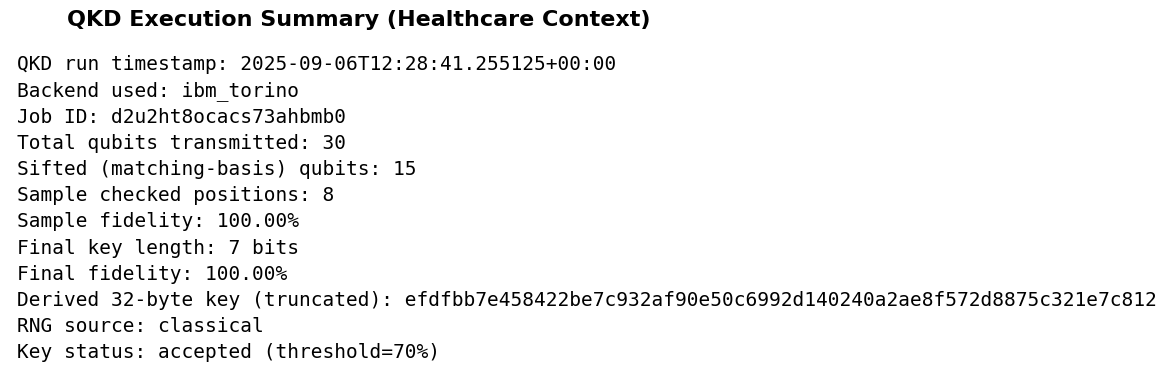

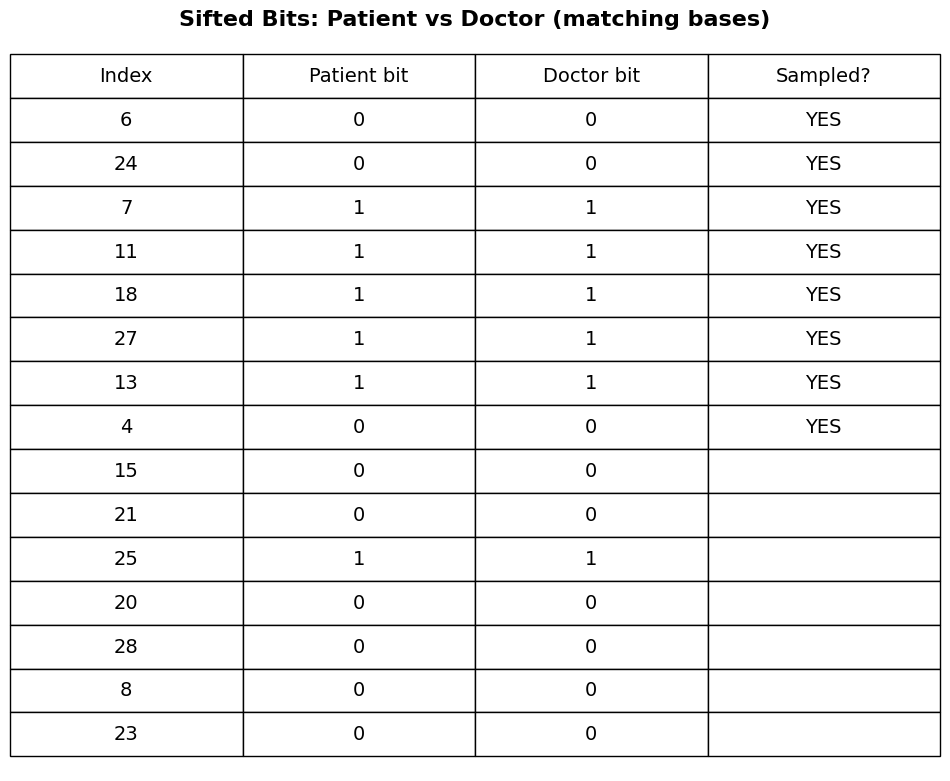

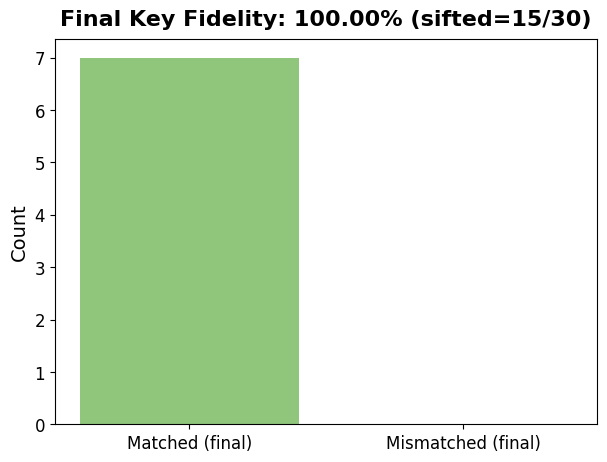

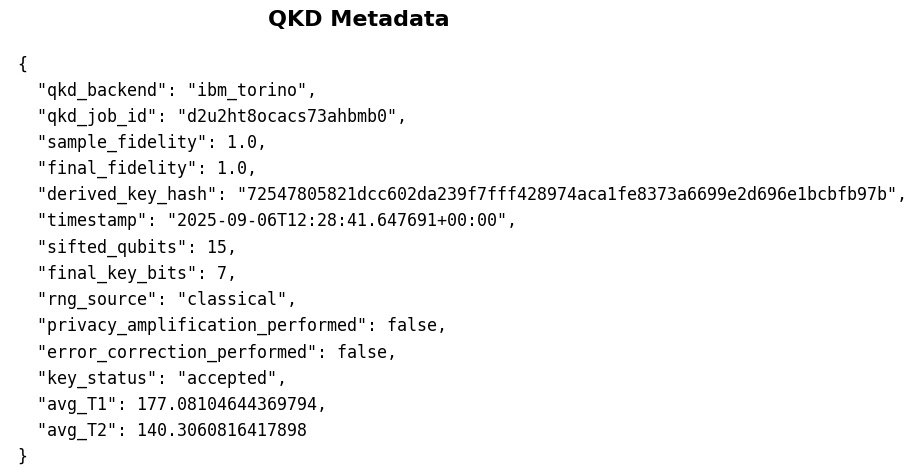


✅ QKD session finished. Save figures (right-click) and copy JSON metadata if needed.


In [ ]:
# Cell X (scientific, 30 qubits): BB84-style QKD on a real IBM Quantum backend
import os
import numpy as np
import hashlib, json
import matplotlib.pyplot as plt
from datetime import datetime, timezone
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# ---- CONFIGURABLE PARAMETERS ----
BIT_NUM = 30             # larger qubit pool for more sifted bits
SAMPLE_SIZE = 8          # sample positions for eavesdrop check
FIDELITY_THRESHOLD = 0.70
PREFERRED_BACKEND = None # e.g. "ibm_brisbane"

# ---- Optional realism toggles ----
USE_QRNG = False             # True -> try to generate patient/doctor bits/bases from the quantum device
PRIVACY_AMPLIFICATION = False  # left False: this script DOES NOT perform true privacy amplification
ERROR_CORRECTION = False       # left False: no error correction performed

# ---- Ensure Qiskit Runtime service available ----
service = None
try:
    service = QiskitRuntimeService()
    print("[qservice] Loaded saved QiskitRuntimeService account.")
except Exception as e:
    print("[qservice] No saved QiskitRuntimeService account available.")
    token = input("Enter your IBM Quantum API token (paste and press Enter) or press Enter to abort: ").strip()
    if not token:
        raise SystemExit("No token provided; aborted by user.")
    service = QiskitRuntimeService(channel="ibm_cloud", token=token)
    print("[qservice] Connected using provided token (ephemeral session).")

# ---- Choose an operational backend ----
backends = [b for b in service.backends() if b.status().operational and not b.configuration().simulator]
if not backends:
    raise SystemExit("No operational backends available right now.")
backend = service.backend(name=PREFERRED_BACKEND) if PREFERRED_BACKEND else sorted(
    backends, key=lambda x:(x.status().pending_jobs,-x.num_qubits))[0]
print(f"[backend] Using: {backend.name} | Qubits={backend.num_qubits} | Pending jobs={backend.status().pending_jobs}")

# ---- Prepare Sampler early (used for optional QRNG and later for the main run) ----
sampler = Sampler(mode=backend)

# ---- Utility: try to extract some backend qubit metrics (T1/T2) for realism ----
avg_T1 = None
avg_T2 = None
try:
    props = backend.properties()
    t1s, t2s = [], []
    for q in props.qubits:
        for param in q:
            # names vary slightly across backends; check common names
            if getattr(param, "name", "") in ("T1", "t1"):
                try: t1s.append(float(param.value))
                except: pass
            if getattr(param, "name", "") in ("T2", "t2"):
                try: t2s.append(float(param.value))
                except: pass
    if t1s: avg_T1 = float(np.mean(t1s))
    if t2s: avg_T2 = float(np.mean(t2s))
except Exception:
    # not critical — proceed without these metrics
    avg_T1 = None
    avg_T2 = None

# ---- Patient & Doctor random bits and bases ----
# Default: classical RNG (numpy). Optionally: try device-based QRNG (creates H on qubits and measures).
rng = np.random.default_rng()

def quantum_random_bits(n, sampler, label="qrng"):
    """Generate n random bits by preparing n qubits in |+> and measuring once.
       Returns numpy array of 0/1 length n. May raise if device doesn't support n qubits in one shot."""
    qc_q = QuantumCircuit(n, n)
    qc_q.h(range(n))
    qc_q.measure(range(n), range(n))
    job = sampler.run([qc_q], shots=1)
    res = job.result()
    counts = res[0].data.c.get_counts()
    bitstr = list(counts.keys())[0]
    return np.array([int(c) for c in bitstr[::-1]])

rng_source = "classical"
if USE_QRNG:
    try:
        # attempt QRNG for each of patient_bits, patient_bases, doctor_bases
        patient_bits  = quantum_random_bits(BIT_NUM, sampler, label="patient_bits")
        patient_bases = quantum_random_bits(BIT_NUM, sampler, label="patient_bases")
        doctor_bases  = quantum_random_bits(BIT_NUM, sampler, label="doctor_bases")
        rng_source = "quantum_device"
        print("[qrng] Generated bits/bases from device (single-shot H-measure).")
    except Exception as e:
        print(f"[qrng] QRNG attempt failed; falling back to classical RNG. Reason: {e}")
        patient_bits  = rng.integers(0,2,size=BIT_NUM)
        patient_bases = rng.integers(0,2,size=BIT_NUM)
        doctor_bases  = rng.integers(0,2,size=BIT_NUM)
        rng_source = "classical_fallback"
else:
    # classical RNG (original behavior)
    patient_bits  = rng.integers(0,2,size=BIT_NUM)
    patient_bases = rng.integers(0,2,size=BIT_NUM)  # 0=Z, 1=X
    doctor_bases  = rng.integers(0,2,size=BIT_NUM)

# ---- Build circuit (logical) ----
qc = QuantumCircuit(BIT_NUM, BIT_NUM)
for i,(b,basis) in enumerate(zip(patient_bits,patient_bases)):
    if b == 1: qc.x(i)
    if basis == 1: qc.h(i)
qc.barrier()
for i,db in enumerate(doctor_bases):
    if db == 1: qc.h(i)
    qc.measure(i,i)

# ---- Quantum circuit BEFORE transpilation ----
print("\nQuantum circuit (logical, Patient prepares; Doctor measures):")
fig1 = qc.draw("mpl")
fig1.suptitle("Quantum Circuit (Logical): Patient prepares, Doctor measures", fontsize=16, weight="bold", y=0.98)
plt.show()

# ---- Transpile ----
pm = generate_preset_pass_manager(target=backend.target, optimization_level=3)
qc_isa = pm.run(qc)

# ---- Quantum circuit AFTER transpilation ----
print("\nQuantum circuit (transpiled to backend):")
fig2 = qc_isa.draw("mpl")
fig2.suptitle(f"Quantum Circuit (Transpiled): Optimized for {backend.name}", fontsize=16, weight="bold", y=0.98)
plt.show()

# ---- Run job ----
print("\n[job] Submitting QKD job...")
# (re-using sampler created earlier)
job = sampler.run([qc_isa], shots=1)
res = job.result()
job_id = job.job_id()
print(f"[job] Job ID: {job_id}")

# ---- Extract measurement ----
counts = res[0].data.c.get_counts()
bitstr = list(counts.keys())[0]
measured_bits = np.array([int(c) for c in bitstr[::-1]])

# ---- Sifting ----
matching_positions = [i for i in range(BIT_NUM) if patient_bases[i] == doctor_bases[i]]
patient_sifted = [int(patient_bits[i]) for i in matching_positions]
doctor_sifted  = [int(measured_bits[i]) for i in matching_positions]

if len(matching_positions) < SAMPLE_SIZE + 2:
    print(f"[warning] Only {len(matching_positions)} matched-basis positions. Increase BIT_NUM to get more.")

rng.shuffle(matching_positions)
sample_positions = matching_positions[:min(SAMPLE_SIZE,len(matching_positions))]
sample_patient = [patient_bits[i] for i in sample_positions]
sample_doctor  = [measured_bits[i] for i in sample_positions]

sample_matches = sum(1 for a,b in zip(sample_patient,sample_doctor) if a==b)
sample_fidelity = sample_matches / (len(sample_positions) if sample_positions else 1)

# ---- Final key derivation ----
sample_set = set(sample_positions)
final_patient = [bit for idx,bit in enumerate(patient_sifted) if matching_positions[idx] not in sample_set]
final_doctor  = [bit for idx,bit in enumerate(doctor_sifted)  if matching_positions[idx] not in sample_set]
bitstring = "".join(map(str, final_patient)) if final_patient else ""
# Note: This is the raw surviving bits hashed with SHA-256 (not a full privacy amplification!)
qkd_key = hashlib.sha256(bitstring.encode()).digest() if final_patient else b""

matches_full = sum(1 for a,b in zip(final_patient,final_doctor) if a==b)
fidelity_full = matches_full / len(final_patient) if final_patient else 0.0

# ---- Realistic key validity check (thresholding) ----
# This script does NOT perform error-correction or genuine privacy amplification.
# We only flag the key as ACCEPTED/REJECTED based on the sample/final fidelity thresholds.
key_status = "accepted"
if sample_fidelity < FIDELITY_THRESHOLD or fidelity_full < FIDELITY_THRESHOLD:
    key_status = "rejected"
    print(f"[security] Key rejected due to low fidelity. Sample fidelity={sample_fidelity:.3f}, Final fidelity={fidelity_full:.3f}.")
    print("[security] Note: Even if accepted, no error-correction or privacy-amplification were applied in this script.")

# ---- Summary stats ----
fig, ax = plt.subplots(figsize=(9,4))
plt.title("QKD Execution Summary (Healthcare Context)", fontsize=16, weight="bold", pad=10)
ax.axis("off")
lines = [
    f"QKD run timestamp: {datetime.now(timezone.utc).isoformat()}",
    f"Backend used: {backend.name}",
    f"Job ID: {job_id}",
    f"Total qubits transmitted: {BIT_NUM}",
    f"Sifted (matching-basis) qubits: {len(matching_positions)}",
    f"Sample checked positions: {len(sample_positions)}",
    f"Sample fidelity: {sample_fidelity*100:.2f}%",
    f"Final key length: {len(final_patient)} bits",
    f"Final fidelity: {fidelity_full*100:.2f}%",
    f"Derived 32-byte key (truncated): {qkd_key.hex()[:64] if qkd_key else '(none)'}",
    f"RNG source: {rng_source}",
    f"Key status: {key_status} (threshold={FIDELITY_THRESHOLD*100:.0f}%)",
]
for i,L in enumerate(lines):
    ax.text(0.01, 0.95 - i*0.085, L, fontsize=14, family="monospace", va="top")
plt.show()

# ---- Sifted table ----
if matching_positions:
    table_data = []
    headers = ["Index", "Patient bit", "Doctor bit", "Sampled?"]
    sampled_set = set(sample_positions)
    for idx in matching_positions:
        p = int(patient_bits[idx])
        d = int(measured_bits[idx])
        sampled = "YES" if idx in sampled_set else ""
        table_data.append([idx, p, d, sampled])
    fig, ax = plt.subplots(figsize=(12, 0.5*len(table_data) + 2))  # taller rows
    plt.title("Sifted Bits: Patient vs Doctor (matching bases)", fontsize=16, weight="bold", pad=10)
    ax.axis("off")
    the_table = ax.table(cellText=table_data, colLabels=headers, loc="center", cellLoc="center", rowLoc="center")
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)
    for (row, col), cell in the_table.get_celld().items():
        cell.set_height(0.06)  # avoid overlap
    plt.show()
else:
    print("[info] No matching-basis positions to display.")

# ---- Fidelity bar plot ----
plt.figure(figsize=(7,5))
plt.title(f"Final Key Fidelity: {fidelity_full*100:.2f}% (sifted={len(matching_positions)}/{BIT_NUM})",
          fontsize=16, weight="bold", pad=10)
plt.bar(["Matched (final)", "Mismatched (final)"],
        [matches_full, max(0, len(final_patient)-matches_full)],
        color=["#90C67C","#EC5228"])
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# ---- Metadata (as image) ----
qkd_meta = {
    "qkd_backend": backend.name,
    "qkd_job_id": job_id,
    "sample_fidelity": float(sample_fidelity),
    "final_fidelity": float(fidelity_full),
    "derived_key_hash": hashlib.sha256(qkd_key).hexdigest() if qkd_key else None,
    "timestamp": datetime.now(timezone.utc).isoformat(),
    "sifted_qubits": len(matching_positions),
    "final_key_bits": len(final_patient),
    "rng_source": rng_source,
    "privacy_amplification_performed": bool(PRIVACY_AMPLIFICATION),
    "error_correction_performed": bool(ERROR_CORRECTION),
    "key_status": key_status,
    "avg_T1": avg_T1,
    "avg_T2": avg_T2
}

fig, ax = plt.subplots(figsize=(9,4))
plt.title("QKD Metadata", fontsize=16, weight="bold", pad=10)
ax.axis("off")
meta_lines = json.dumps(qkd_meta, indent=2).split("\n")
for i, L in enumerate(meta_lines):
    ax.text(0.01, 0.95 - i*0.085, L, fontsize=12, family="monospace", va="top")
plt.show()

print("\n✅ QKD session finished. Save figures (right-click) and copy JSON metadata if needed.")


In [ ]:
# Cell 3: Interactive demo for the exact scenario
# Doctor at NRS Hospital requests access to a patient's MRI image.
# Run in Google Colab. Press Enter to accept defaults when prompted.

import hashlib, secrets, base64, json
from datetime import datetime, timezone
from typing import List, Dict, Any, Tuple
from cryptography.hazmat.primitives.ciphers.aead import AESGCM
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.kdf.hkdf import HKDF

# ---------- Helpers & Models ----------
ROLES = ["Doctor", "Nurse", "Analyst", "Patient"]

class User:
    def __init__(self, user_id: str, name: str, role: str, organization: str = ""):
        assert role in ROLES, f"Role must be one of {ROLES}"
        self.user_id = user_id
        self.name = name
        self.role = role
        self.organization = organization
        # Each user gets an ECC keypair
        self.ec_private = ec.generate_private_key(ec.SECP256R1())
        self.ec_public = self.ec_private.public_key()
    def to_dict(self):
        return {"user_id": self.user_id, "name": self.name, "role": self.role, "organization": self.organization}
    def __repr__(self):
        return f"User({self.user_id}, {self.name}, {self.role}, {self.organization})"

# ---------- AES-GCM + ECC wrappers ----------
def generate_sym_key(nbytes: int = 32) -> bytes:
    return secrets.token_bytes(nbytes)

def aes_encrypt(plaintext: str, key: bytes) -> str:
    aesgcm = AESGCM(key)
    nonce = secrets.token_bytes(12)
    ct = aesgcm.encrypt(nonce, plaintext.encode("utf-8"), None)
    return base64.b64encode(nonce + ct).decode("utf-8")

def aes_decrypt(b64_cipher: str, key: bytes) -> str:
    raw = base64.b64decode(b64_cipher.encode("utf-8"))
    nonce, ct = raw[:12], raw[12:]
    aesgcm = AESGCM(key)
    pt = aesgcm.decrypt(nonce, ct, None)
    return pt.decode("utf-8")

def ecc_wrap_key(sym_key: bytes, public_key) -> str:
    eph_private = ec.generate_private_key(ec.SECP256R1())
    shared = eph_private.exchange(ec.ECDH(), public_key)
    derived = HKDF(algorithm=hashes.SHA256(), length=32, salt=None, info=b"ecc-wrap").derive(shared)
    aesgcm = AESGCM(derived)
    nonce = secrets.token_bytes(12)
    ct = aesgcm.encrypt(nonce, sym_key, None)
    eph_pub_bytes = eph_private.public_key().public_bytes(
        encoding=serialization.Encoding.X962,
        format=serialization.PublicFormat.UncompressedPoint
    )
    return base64.b64encode(nonce + eph_pub_bytes + ct).decode("utf-8")

def ecc_unwrap_key(wrapped_b64: str, private_key) -> bytes:
    raw = base64.b64decode(wrapped_b64.encode("utf-8"))
    nonce, eph_pub_bytes, ct = raw[:12], raw[12:77], raw[77:]
    eph_pub = ec.EllipticCurvePublicKey.from_encoded_point(ec.SECP256R1(), eph_pub_bytes)
    shared = private_key.exchange(ec.ECDH(), eph_pub)
    derived = HKDF(algorithm=hashes.SHA256(), length=32, salt=None, info=b"ecc-wrap").derive(shared)
    aesgcm = AESGCM(derived)
    return aesgcm.decrypt(nonce, ct, None)

# ---------- Merkle & Hash helpers ----------
def sha256_hex(data: bytes) -> str:
    return hashlib.sha256(data).hexdigest()

def tx_hash(tx: Dict[str, Any]) -> str:
    tx_json = json.dumps(tx, sort_keys=True).encode("utf-8")
    return sha256_hex(tx_json)

# ---------- Blockchain classes (permissioned, optimized) ----------
class Block:
    __slots__ = ("index", "previous_hash", "transactions", "tx_hashes",
                 "merkle_root", "timestamp", "block_hash")

    def __init__(self, index: int, previous_hash: str, transactions: List[Dict[str,Any]], timestamp: str = None):
        self.index = index
        self.previous_hash = previous_hash
        self.transactions = transactions
        self.tx_hashes = [tx_hash(tx) for tx in transactions]
        self.merkle_root = self.compute_merkle_root()
        self.timestamp = timestamp or datetime.now(timezone.utc).isoformat()
        self.block_hash = self.compute_block_hash()

    def compute_merkle_root(self) -> str:
        if not self.tx_hashes:
            return sha256_hex(b"")
        level = self.tx_hashes
        while len(level) > 1:
            it = iter(level)
            level = [sha256_hex((l + (r if (r:=next(it,None)) else l)).encode("utf-8")) for l in it]
        return level[0]

    def compute_block_hash(self) -> str:
        header = json.dumps({
            "idx": self.index,
            "prev": self.previous_hash,
            "merkle": self.merkle_root,
            "ts": self.timestamp
        }, sort_keys=True).encode("utf-8")
        return sha256_hex(header)

    def __repr__(self):
        return f"Block(idx={self.index}, hash={self.block_hash[:10]}..., txs={len(self.transactions)})"

class PermissionedBlockchain:
    def __init__(self, authorized_nodes: List[str] = None):
        self.authorized_nodes = set(authorized_nodes or [])
        self.chain: List[Block] = []
        self.tx_index: Dict[str, Tuple[int, str]] = {}
        self.create_genesis_block()

    def create_genesis_block(self):
        genesis = Block(0, "0"*64, [{"type":"GENESIS", "note":"Permissioned chain genesis"}])
        self.chain.append(genesis)

    def last_block(self) -> Block:
        return self.chain[-1]

    def add_block(self, node_id: str, transactions: List[Dict[str,Any]]) -> Block:
        if node_id not in self.authorized_nodes:
            raise PermissionError(f"Node '{node_id}' not authorized")
        new_block = Block(len(self.chain), self.last_block().block_hash, transactions)
        self.chain.append(new_block)
        for tx in transactions:
            if "record_id" in tx:
                self.tx_index[tx["record_id"]] = (new_block.index, tx_hash(tx))
        return new_block

    def validate_chain(self) -> bool:
        for i in range(1, len(self.chain)):
            prev, curr = self.chain[i-1], self.chain[i]
            if curr.previous_hash != prev.block_hash:
                return False
            if curr.block_hash != curr.compute_block_hash():
                return False
        return True

    def find_record(self, record_id: str):
        if record_id in self.tx_index:
            idx, txh = self.tx_index[record_id]
            blk = self.chain[idx]
            return blk, txh, blk.tx_hashes.index(txh), blk.tx_hashes
        for blk in self.chain:
            for j, tx in enumerate(blk.transactions):
                if tx.get("record_id") == record_id:
                    return blk, blk.tx_hashes[j], j, blk.tx_hashes
        return None, None, None, None

# ---------- Off-chain & consent storage ----------
off_chain_storage: Dict[str, Dict[str, Any]] = {}
key_store: Dict[str, str] = {}  # stores ECC-wrapped AES keys (base64)
consent_tokens: Dict[str, Dict[str, Any]] = {}

def create_consent_token(patient_id: str, record_id: str, allowed_roles: List[str], expiry_seconds: int = 3600) -> str:
    token = secrets.token_hex(16)
    expiry = datetime.now(timezone.utc).timestamp() + expiry_seconds
    consent_tokens[token] = {
        "patient_id": patient_id,
        "record_id": record_id,
        "allowed_roles": allowed_roles,
        "issued_at": datetime.now(timezone.utc).isoformat(),
        "expiry": expiry,
        "granted": True
    }
    return token

def validate_consent_token(token: str, requester_role: str) -> bool:
    meta = consent_tokens.get(token)
    if not meta or not meta.get("granted"):
        return False
    if datetime.now(timezone.utc).timestamp() > meta["expiry"]:
        return False
    return requester_role in meta["allowed_roles"]

# ---------- Role policy ----------
ROLE_POLICIES = {
    "Doctor": {"can_view": ["MRI", "XRAY", "REPORT"], "can_modify": ["REPORT"]},
    "Nurse": {"can_view": ["REPORT"], "can_modify": []},
    "Analyst": {"can_view": ["ANONYMIZED_REPORT"], "can_modify": []},
    "Patient": {"can_view": ["MRI", "XRAY", "REPORT"], "can_modify": ["OWN_CONSENT"]},
}

# ---------- Registries ----------
user_registry: Dict[str, User] = {}
blockchain_registry: Dict[str, PermissionedBlockchain] = {}
record_index_to_blockinfo: Dict[str, Tuple[int, str]] = {}

def register_user(user: User):
    user_registry[user.user_id] = user
    print(f"[registry] Registered user: {user}")

def deploy_node(node_id: str):
    chain = PermissionedBlockchain(authorized_nodes=[node_id])
    blockchain_registry[node_id] = chain
    print(f"[blockchain] Deployed permissioned chain for node '{node_id}' (genesis block hash {chain.chain[0].block_hash[:12]}..., timestamp {chain.chain[0].timestamp})")
    return chain

def store_record(node_id: str, record_id: str, owner_patient_id: str, data_type: str):
    if node_id not in blockchain_registry:
        raise RuntimeError(f"Node '{node_id}' not deployed")
    chain = blockchain_registry[node_id]
    if owner_patient_id not in key_store:
        sym_key = generate_sym_key(32)
        wrapped = ecc_wrap_key(sym_key, user_registry[owner_patient_id].ec_public)
        key_store[owner_patient_id] = wrapped
        print(f"[keystore] Generated AES-256 key (ECC-wrapped) for patient {owner_patient_id}")
    sym_key = ecc_unwrap_key(key_store[owner_patient_id], user_registry[owner_patient_id].ec_private)
    if record_id not in off_chain_storage:
        fake_content = f"<{data_type}_DATA:{record_id}:owner={owner_patient_id}:ts={datetime.now(timezone.utc).isoformat()}>"
        off_chain_storage[record_id] = {
            "encrypted_data": aes_encrypt(fake_content, sym_key),
            "owner_patient_id": owner_patient_id,
            "data_type": data_type,
            "stored_at": datetime.now(timezone.utc).isoformat()
        }
        print(f"[off-chain] Stored encrypted {data_type} for record {record_id}")
    tx = {"type": "STORE_RECORD", "record_id": record_id, "owner_patient_id": owner_patient_id, "data_type": data_type}
    new_block = chain.add_block(node_id, [tx])
    record_index_to_blockinfo[record_id] = (new_block.index, new_block.block_hash)
    print(f"[blockchain] Stored tx for record {record_id} in Block {new_block.index} (merkle_root={new_block.merkle_root[:12]}...)")
    return new_block

# ---------- Merkle proof helpers ----------
def find_block_containing_record(node_id: str, record_id: str):
    return blockchain_registry[node_id].find_record(record_id)

def merkle_proof_for_tx(tx_hash_val: str, tx_hashes: List[str]) -> Tuple[List[Tuple[str,str]], str]:
    if tx_hash_val not in tx_hashes:
        raise ValueError("tx_hash not in provided tx_hashes")
    current = tx_hashes[:]
    proof = []
    idx = current.index(tx_hash_val)
    while len(current) > 1:
        next_level = []
        for i in range(0, len(current), 2):
            left = current[i]
            right = current[i+1] if i+1 < len(current) else current[i]
            combined_hash = sha256_hex((left + right).encode("utf-8"))
            next_level.append(combined_hash)
            if i == idx or i+1 == idx:
                sibling, pos = (right, "L") if i == idx else (left, "R")
                proof.append((sibling, pos))
                idx = len(next_level) - 1
        current = next_level
    return proof, current[0]

def verify_merkle_proof(tx_hash_val: str, proof: List[Tuple[str,str]], root: str) -> bool:
    current_hash = tx_hash_val
    for sibling, pos in proof:
        if pos == "L":
            current_hash = sha256_hex((current_hash + sibling).encode("utf-8"))
        else:
            current_hash = sha256_hex((sibling + current_hash).encode("utf-8"))
    return current_hash == root

# ---------- Access flow ----------
def request_access(node_id: str, requester_id: str, record_id: str, consent_token: str) -> bool:
    print(f"\n[access_request] User '{requester_id}' requests access to '{record_id}' on node '{node_id}'")
    requester = user_registry.get(requester_id)
    if not requester:
        print("[access_request] ERROR: Requester not found.")
        return False
    block, txh, tx_idx, tx_hashes = find_block_containing_record(node_id, record_id)
    if not block:
        print("[access_request] ERROR: Record not found on-chain.")
        return False
    print(f"[access_request] Found record tx in Block {block.index} (merkle_root={block.merkle_root[:10]}...)")
    proof, root = merkle_proof_for_tx(txh, tx_hashes)
    proof_ok = verify_merkle_proof(txh, proof, root)
    print(f"[access_request] Merkle proof verification: {'OK' if proof_ok else 'FAILED'}")
    if not proof_ok:
        print("[access_request] ERROR: Merkle verification failed. Possible tampering.")
        return False
    if not validate_consent_token(consent_token, requester.role):
        print("[access_request] Access denied: Invalid/expired consent token or role not allowed.")
        return False
    print("[access_request] Consent token valid for requester role")
    tx = next(t for t in block.transactions if t.get("record_id") == record_id)
    data_type = tx.get("data_type", "UNKNOWN")
    allowed_views = ROLE_POLICIES.get(requester.role, {}).get("can_view", [])
    if data_type not in allowed_views:
        print(f"[access_request] Access denied by role policy: '{requester.role}' cannot view '{data_type}'")
        return False
    print(f"[access_request] Role policy allows viewing '{data_type}' for '{requester.role}'")
    owner_id = off_chain_storage[record_id]["owner_patient_id"]
    sym_key = ecc_unwrap_key(key_store[owner_id], user_registry[owner_id].ec_private)
    decrypted = aes_decrypt(off_chain_storage[record_id]["encrypted_data"], sym_key)
    print(f"[access_request] ACCESS GRANTED. Decrypted content: {decrypted}")
    access_tx = {
        "type": "ACCESS_LOG",
        "record_id": record_id,
        "requester_id": requester.user_id,
        "requester_role": requester.role,
        "timestamp": datetime.now(timezone.utc).isoformat(),
        "action": "VIEW"
    }
    blockchain_registry[node_id].add_block(node_id, [access_tx])
    print(f"[access_request] Access event recorded on-chain in block {blockchain_registry[node_id].last_block().index}")
    return True

# ---------- Interactive flow (inputs) ----------
print("\n=== Interactive Permissioned Access Demo (NRS hospital MRI scenario) ===")
node_id_input = input("Enter hospital node id (default 'NRS_HOSPITAL_NODE'): ").strip() or "NRS_HOSPITAL_NODE"
deploy_node(node_id_input)

p_id = input("Enter patient id (default 'patient_001'): ").strip() or "patient_001"
p_name = input("Enter patient name (default 'Alice Patient'): ").strip() or "Alice Patient"
p_org = input("Enter patient organization (default 'NRS Hospital'): ").strip() or "NRS Hospital"
patient = User(p_id, p_name, "Patient", p_org)
register_user(patient)

d_id = input("Enter doctor id (default 'doctor_007'): ").strip() or "doctor_007"
d_name = input("Enter doctor name (default 'Dr. Bob'): ").strip() or "Dr. Bob"
d_org = input("Enter doctor's organization (default 'NRS Hospital'): ").strip() or "NRS Hospital"
doctor = User(d_id, d_name, "Doctor", d_org)
register_user(doctor)

record_id = input("Enter record id to store (default 'record_mri_0001'): ").strip() or "record_mri_0001"
store_record(node_id_input, record_id, patient.user_id, "MRI")

print("\n-- Patient grants consent for specific roles --")
allowed = input("Enter comma-separated allowed roles (default 'Doctor'): ").strip() or "Doctor"
allowed_roles = [r.strip() for r in allowed.split(",") if r.strip() in ROLES]
expiry = input("Consent expiry seconds (default 3600): ").strip()
expiry = int(expiry) if expiry.isdigit() else 3600
token = create_consent_token(patient.user_id, record_id, allowed_roles, expiry_seconds=expiry)
print(f"[consent] Consent token created: {token}")
print(f"[consent] Token metadata: {json.dumps(consent_tokens[token], indent=2)}")

use_token = input("\nSimulate doctor using the token to request access now? (Y/n): ").strip().lower() or "y"
if use_token == "y":
    success = request_access(node_id_input, doctor.user_id, record_id, token)
    print(f"\nResult: {'ACCESS GRANTED' if success else 'ACCESS DENIED'}")
else:
    print("Skipping doctor access simulation. You can call request_access(...) later programmatically.")



=== Interactive Permissioned Access Demo (NRS hospital MRI scenario) ===
Enter hospital node id (default 'NRS_HOSPITAL_NODE'): h1
[blockchain] Deployed permissioned chain for node 'h1' (genesis block hash b1f6b401d471..., timestamp 2025-09-06T12:28:56.843422+00:00)
Enter patient id (default 'patient_001'): p1
Enter patient name (default 'Alice Patient'): Alice
Enter patient organization (default 'NRS Hospital'): NRS
[registry] Registered user: User(p1, Alice, Patient, NRS)
Enter doctor id (default 'doctor_007'): d1
Enter doctor name (default 'Dr. Bob'): Bob
Enter doctor's organization (default 'NRS Hospital'): NRS
[registry] Registered user: User(d1, Bob, Doctor, NRS)
Enter record id to store (default 'record_mri_0001'): mri1
[keystore] Generated AES-256 key (ECC-wrapped) for patient p1
[off-chain] Stored encrypted MRI for record mri1
[blockchain] Stored tx for record mri1 in Block 1 (merkle_root=512706bb35de...)

-- Patient grants consent for specific roles --
Enter comma-separated a

In [ ]:


# Cell X: Interactive, step-by-step real-QKD exchange between Patient (Alice) and Doctor (Bob)
# - Requires: Qiskit Runtime saved account (QiskitRuntimeService), Cells 1-3 run
# - Performs BB84 QKD to derive a 32-byte key
# - Safely re-encrypts the record with the new key to avoid decryption mismatches

import numpy as np, hashlib, json
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumCircuit
from datetime import datetime, timezone

# CONFIG
BIT_NUM = 20                # <=30 is recommended for quick runs
SAMPLE_SIZE = 6             # number of bits to reveal for eavesdrop check
FIDELITY_THRESHOLD = 0.85   # acceptable fidelity
DEFAULT_BACKEND = "ibm_brisbane"

# --- Pre-check ---
if 'user_registry' not in globals() or 'store_record' not in globals():
    raise RuntimeError("Please run Cells 1-3 first to initialize blockchain, registries, and helper functions.")

# Qiskit service setup
service = QiskitRuntimeService()
try:
    backend = service.backend(name=DEFAULT_BACKEND)
    print(f"[backend] Using {DEFAULT_BACKEND}")
except Exception as e:
    print(f"[backend] Default '{DEFAULT_BACKEND}' not available: {e}")
    candidates = [b for b in service.backends() if b.status().operational and not b.configuration().simulator]
    backend = sorted(candidates, key=lambda x: x.status().pending_jobs)[0]
    print(f"[backend] Auto-selected {backend.name}")

sampler = Sampler(mode=backend)

# Identify participants
print("\n--- Identify participants ---")
patient_id = input("Enter patient id (e.g., p1) [default 'p1']: ").strip() or "p1"
doctor_id  = input("Enter doctor id (e.g., d1) [default 'd1']: ").strip() or "d1"
record_id  = input("Enter record id to secure (e.g., record_mri_0001) [default 'record_mri_0001']: ").strip() or "record_mri_0001"

if patient_id not in user_registry or doctor_id not in user_registry:
    print("[warning] One or both users not found in registry. Check Cell 3.")
    print("User registry contains:", list(user_registry.keys()))

print(f"\nStarting BB84 QKD session between Patient('{patient_id}') and Doctor('{doctor_id}') on backend {backend.name}.\n")
input("Press Enter to generate Alice's bits/bases and submit the quantum job...")

# --- Generate random bits and bases for Alice and Bob ---
rng = np.random.default_rng()
abits  = rng.integers(0,2, size=BIT_NUM)
abase  = rng.integers(0,2, size=BIT_NUM)
bbase  = rng.integers(0,2, size=BIT_NUM)

# --- Build quantum circuit ---
qc = QuantumCircuit(BIT_NUM, BIT_NUM)
for i in range(BIT_NUM):
    if abits[i] == 1: qc.x(i)
    if abase[i] == 1: qc.h(i)
qc.barrier()
for i in range(BIT_NUM):
    if bbase[i] == 1: qc.h(i)
    qc.measure(i, i)

# Transpile and run job
pm = generate_preset_pass_manager(target=backend.target, optimization_level=3)
qc_isa = pm.run(qc)
print("[job] Submitting QKD job to IBM backend...")
job = sampler.run([qc_isa], shots=1)
res = job.result()
job_id = job.job_id()

# Extract Bob's measurement
counts = res[0].data.c.get_counts()
bitstr = list(counts.keys())[0]
bmeas = np.array([int(x) for x in bitstr[::-1]])

# --- Sifting phase ---
matching_positions = [i for i in range(BIT_NUM) if int(abase[i]) == int(bbase[i])]
a_sifted = [int(abits[i]) for i in matching_positions]
b_sifted = [int(bmeas[i]) for i in matching_positions]

print(f"\nQKD job submitted. Job ID: {job_id}")
print(f"Total bits: {BIT_NUM}, matched-base positions: {len(matching_positions)}")

if len(matching_positions) < SAMPLE_SIZE + 2:
    raise RuntimeError("Too few matched-basis bits. Increase BIT_NUM and rerun.")

# --- Sample for eavesdrop detection ---
rng.shuffle(matching_positions)
sample_positions = matching_positions[:SAMPLE_SIZE]
sample_a = [int(abits[i]) for i in sample_positions]
sample_b = [int(bmeas[i]) for i in sample_positions]

print("\n--- Classical channel (sample verification) ---")
print(f"Sample positions (indices in original bitstring): {sample_positions}")
input("Patient: Press Enter to reveal your sample bits...")
print(f"Patient (Alice) reveals: {sample_a}")
input("Doctor: Press Enter to reveal your sample bits...")
print(f"Doctor (Bob) measured: {sample_b}")

# Fidelity check
matches = sum(1 for x,y in zip(sample_a, sample_b) if x==y)
sample_fidelity = matches / SAMPLE_SIZE
print(f"\nSample fidelity: {matches}/{SAMPLE_SIZE} = {sample_fidelity:.3f}")

choice = input("Accept key? (y/n) [default y]: ").strip().lower() or "y"
if choice != "y":
    raise SystemExit("QKD aborted by user.")

# --- Key derivation ---
sample_indices_in_sift = [matching_positions.index(p) for p in sample_positions]
final_a = [bit for idx,bit in enumerate(a_sifted) if idx not in sample_indices_in_sift]
final_b = [bit for idx,bit in enumerate(b_sifted) if idx not in sample_indices_in_sift]
matches_full = sum(1 for x,y in zip(final_a, final_b) if x==y)
fidelity_full = matches_full / len(final_a) if final_a else 0.0
bit_string = "".join(map(str, final_a))
qkd_key = hashlib.sha256(bit_string.encode()).digest()

print("\n--- QKD RESULT ---")
print(f"Final sifted key length (bits): {len(final_a)}")
print(f"Estimated fidelity on remaining bits: {fidelity_full:.3f}")
print(f"Derived 32-byte symmetric key (hex): {qkd_key.hex()}")

# --- Store key and metadata ---
# Wrap QKD-derived key with patient's ECC public key (consistent with Cell 3 storage)
wrapped_qkd = ecc_wrap_key(qkd_key, user_registry[patient_id].ec_public)
key_store[patient_id] = wrapped_qkd

meta = {
    "qkd_backend": backend.name,
    "qkd_job_id": job_id,
    "sample_fidelity": float(sample_fidelity),
    "derived_key_hash": hashlib.sha256(qkd_key).hexdigest(),
    "timestamp": datetime.now(timezone.utc).isoformat()
}
if record_id in off_chain_storage:
    off_chain_storage[record_id]["qkd_meta"] = meta
    print(f"[audit] Inserted QKD metadata into off_chain_storage[{record_id}]")
else:
    print("[audit] Record not present yet; will encrypt now.")

print("\n[secure] Re-encrypting record with new QKD key...")
node_choice = input("Enter node id for storage (default '1'): ").strip() or "1"

# Unwrap the QKD-derived key (already stored in key_store)
sym_key = ecc_unwrap_key(key_store[patient_id], user_registry[patient_id].ec_private)

# Overwrite ciphertext in off_chain_storage with new encryption
fake_content = f"<MRI_DATA:{record_id}:owner={patient_id}:ts={datetime.now(timezone.utc).isoformat()}>"
off_chain_storage[record_id] = {
    "encrypted_data": aes_encrypt(fake_content, sym_key),
    "owner_patient_id": patient_id,
    "data_type": "MRI",
    "stored_at": datetime.now(timezone.utc).isoformat(),
    "qkd_meta": meta
}

# Log to blockchain
tx = {"type": "STORE_RECORD", "record_id": record_id, "owner_patient_id": patient_id, "data_type": "MRI"}
new_block = blockchain_registry[node_choice].add_block(node_choice, [tx])
record_index_to_blockinfo[record_id] = (new_block.index, new_block.block_hash)

print(f"[secure] Record {record_id} re-encrypted with QKD key and updated on blockchain.")

# --- Create consent token and access ---
new_token = create_consent_token(patient_id, record_id, ["Doctor"], expiry_seconds=600)
print(f"[consent] New consent token for Doctor: {new_token}")
print("\nSimulating doctor access now with new token...")
access_node = input("Enter node id for access (default '1'): ").strip() or "1"
ok = request_access(node_id=access_node, requester_id=doctor_id, record_id=record_id, consent_token=new_token)
print("\nFinal access result:", "ACCESS GRANTED" if ok else "ACCESS DENIED")

print("\nQKD session complete. Check off_chain_storage[record_id]['qkd_meta'] for audit evidence.")


[backend] Using ibm_brisbane

--- Identify participants ---
Enter patient id (e.g., p1) [default 'p1']: p1
Enter doctor id (e.g., d1) [default 'd1']: d1
Enter record id to secure (e.g., record_mri_0001) [default 'record_mri_0001']: mri1

Starting BB84 QKD session between Patient('p1') and Doctor('d1') on backend ibm_brisbane.

Press Enter to generate Alice's bits/bases and submit the quantum job...
[job] Submitting QKD job to IBM backend...

QKD job submitted. Job ID: d2u2icc7sg0c73apbfs0
Total bits: 20, matched-base positions: 14

--- Classical channel (sample verification) ---
Sample positions (indices in original bitstring): [4, 19, 3, 5, 1, 16]
Patient: Press Enter to reveal your sample bits...
Patient (Alice) reveals: [1, 1, 0, 0, 1, 1]
Doctor: Press Enter to reveal your sample bits...
Doctor (Bob) measured: [1, 1, 0, 0, 1, 1]

Sample fidelity: 6/6 = 1.000
Accept key? (y/n) [default y]: y

--- QKD RESULT ---
Final sifted key length (bits): 8
Estimated fidelity on remaining bits: 1

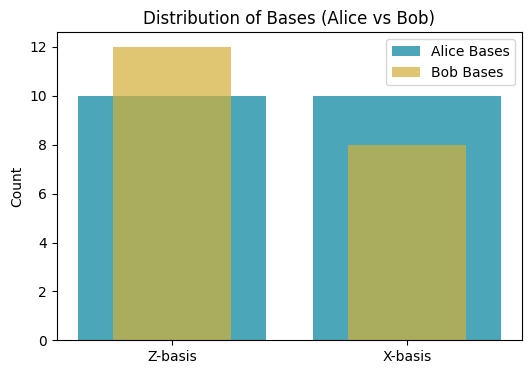

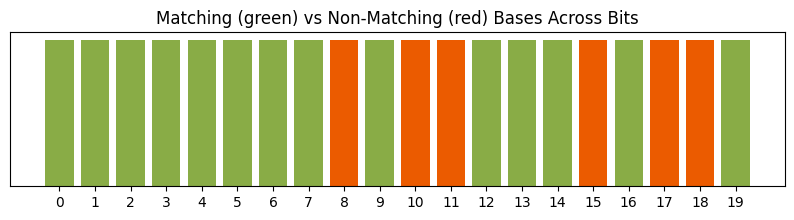

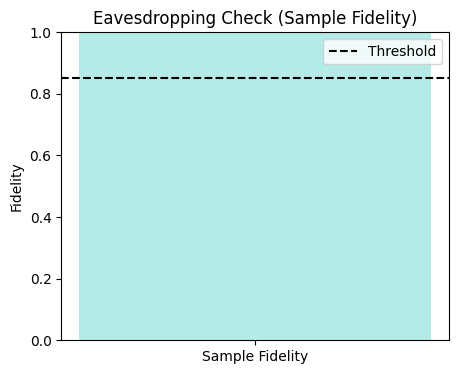

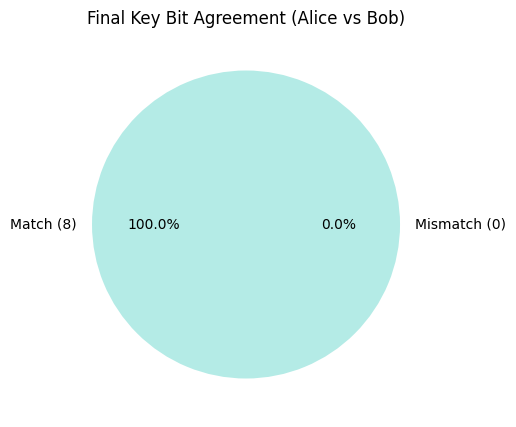

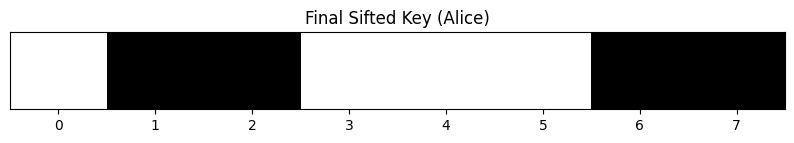

In [ ]:
# --- Visualization for experimental validation ---
import matplotlib.pyplot as plt
import numpy as np

# 1. Distribution of Alice and Bob bases (to show randomness)
plt.figure(figsize=(6,4))
plt.hist(abase, bins=[-0.5,0.5,1.5], rwidth=0.8, alpha=0.7, label="Alice Bases", color="#00809D")
plt.hist(bbase, bins=[-0.5,0.5,1.5], rwidth=0.5, alpha=0.7, label="Bob Bases", color="#D3AF37")
plt.xticks([0,1], ["Z-basis", "X-basis"])
plt.ylabel("Count")
plt.title("Distribution of Bases (Alice vs Bob)")
plt.legend()
plt.show()


# 2. Matching positions (visualizing sifting)
plt.figure(figsize=(10,2))
x = np.arange(BIT_NUM)
colors = ["#89AC46" if abase[i]==bbase[i] else "#EB5B00" for i in range(BIT_NUM)]
plt.bar(x, [1]*BIT_NUM, color=colors)
plt.xticks(x)
plt.yticks([])
plt.title("Matching (green) vs Non-Matching (red) Bases Across Bits")
plt.show()

# 3. Sample fidelity (bar plot)
plt.figure(figsize=(5,4))
plt.bar(["Sample Fidelity"], [sample_fidelity], color="#B4EBE6")
plt.axhline(y=FIDELITY_THRESHOLD, color='black', linestyle='--', label="Threshold")
plt.ylim(0,1)
plt.ylabel("Fidelity")
plt.title("Eavesdropping Check (Sample Fidelity)")
plt.legend()
plt.show()

# 4. Full key fidelity (pie chart for agreement vs disagreement)
matches = matches_full
mismatches = len(final_a) - matches_full
plt.figure(figsize=(5,5))
plt.pie([matches, mismatches],
        labels=[f"Match ({matches})", f"Mismatch ({mismatches})"],
        autopct="%1.1f%%",
        colors=["#B4EBE6", "#E07A5F"])
plt.title("Final Key Bit Agreement (Alice vs Bob)")
plt.show()

# 5. Final key bitstring visualization (binary strip)
plt.figure(figsize=(10,1))
plt.imshow(np.array(final_a).reshape(1,-1), cmap="binary", aspect="auto")
plt.yticks([])
plt.xticks(range(len(final_a)))
plt.title("Final Sifted Key (Alice)")
plt.show()


In [ ]:
# --- Cell 1: Setup and utilities for negative test cases ---

import matplotlib.pyplot as plt
import pandas as pd
import time, os
from datetime import datetime

# Ensure output directory exists
os.makedirs("validation_outputs", exist_ok=True)

# Initialize empty result list
neg_test_results = []

# Helper to log and print results
def log_result(test_name, status, message):
    entry = {
        "Timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Test": test_name,
        "Status": status,
        "Message": message
    }
    neg_test_results.append(entry)
    print(f"[{test_name}] {status} - {message}")



--- BLOCKCHAIN NEGATIVE TEST CASES ---

[TEST 1] Unauthorized Role Access
Enter unauthorized role (default 'nurse1'): DataAnalyst12

[access_request] User 'DataAnalyst12' requests access to 'mri1' on node 'h1'
[access_request] ERROR: Requester not found.
Access DENIED (as expected)

[TEST 2] Invalid Record ID
Enter fake record id (default 'invalid_record_9999'): XRay25

[access_request] User 'd1' requests access to 'XRay25' on node 'h1'
[access_request] ERROR: Record not found on-chain.
Access DENIED (as expected)

[TEST 3] Expired Token
Enter expiry time in seconds (default 1): 3
Waiting for token to expire...

[access_request] User 'd1' requests access to 'mri1' on node 'h1'
[access_request] Found record tx in Block 4 (merkle_root=43b4a34b8e...)
[access_request] Merkle proof verification: OK
[access_request] Access denied: Invalid/expired consent token or role not allowed.
Access DENIED (token expired as expected)

[TEST 4] Invalid Token Format
Enter fake token (default 'FAKE_TOKEN_

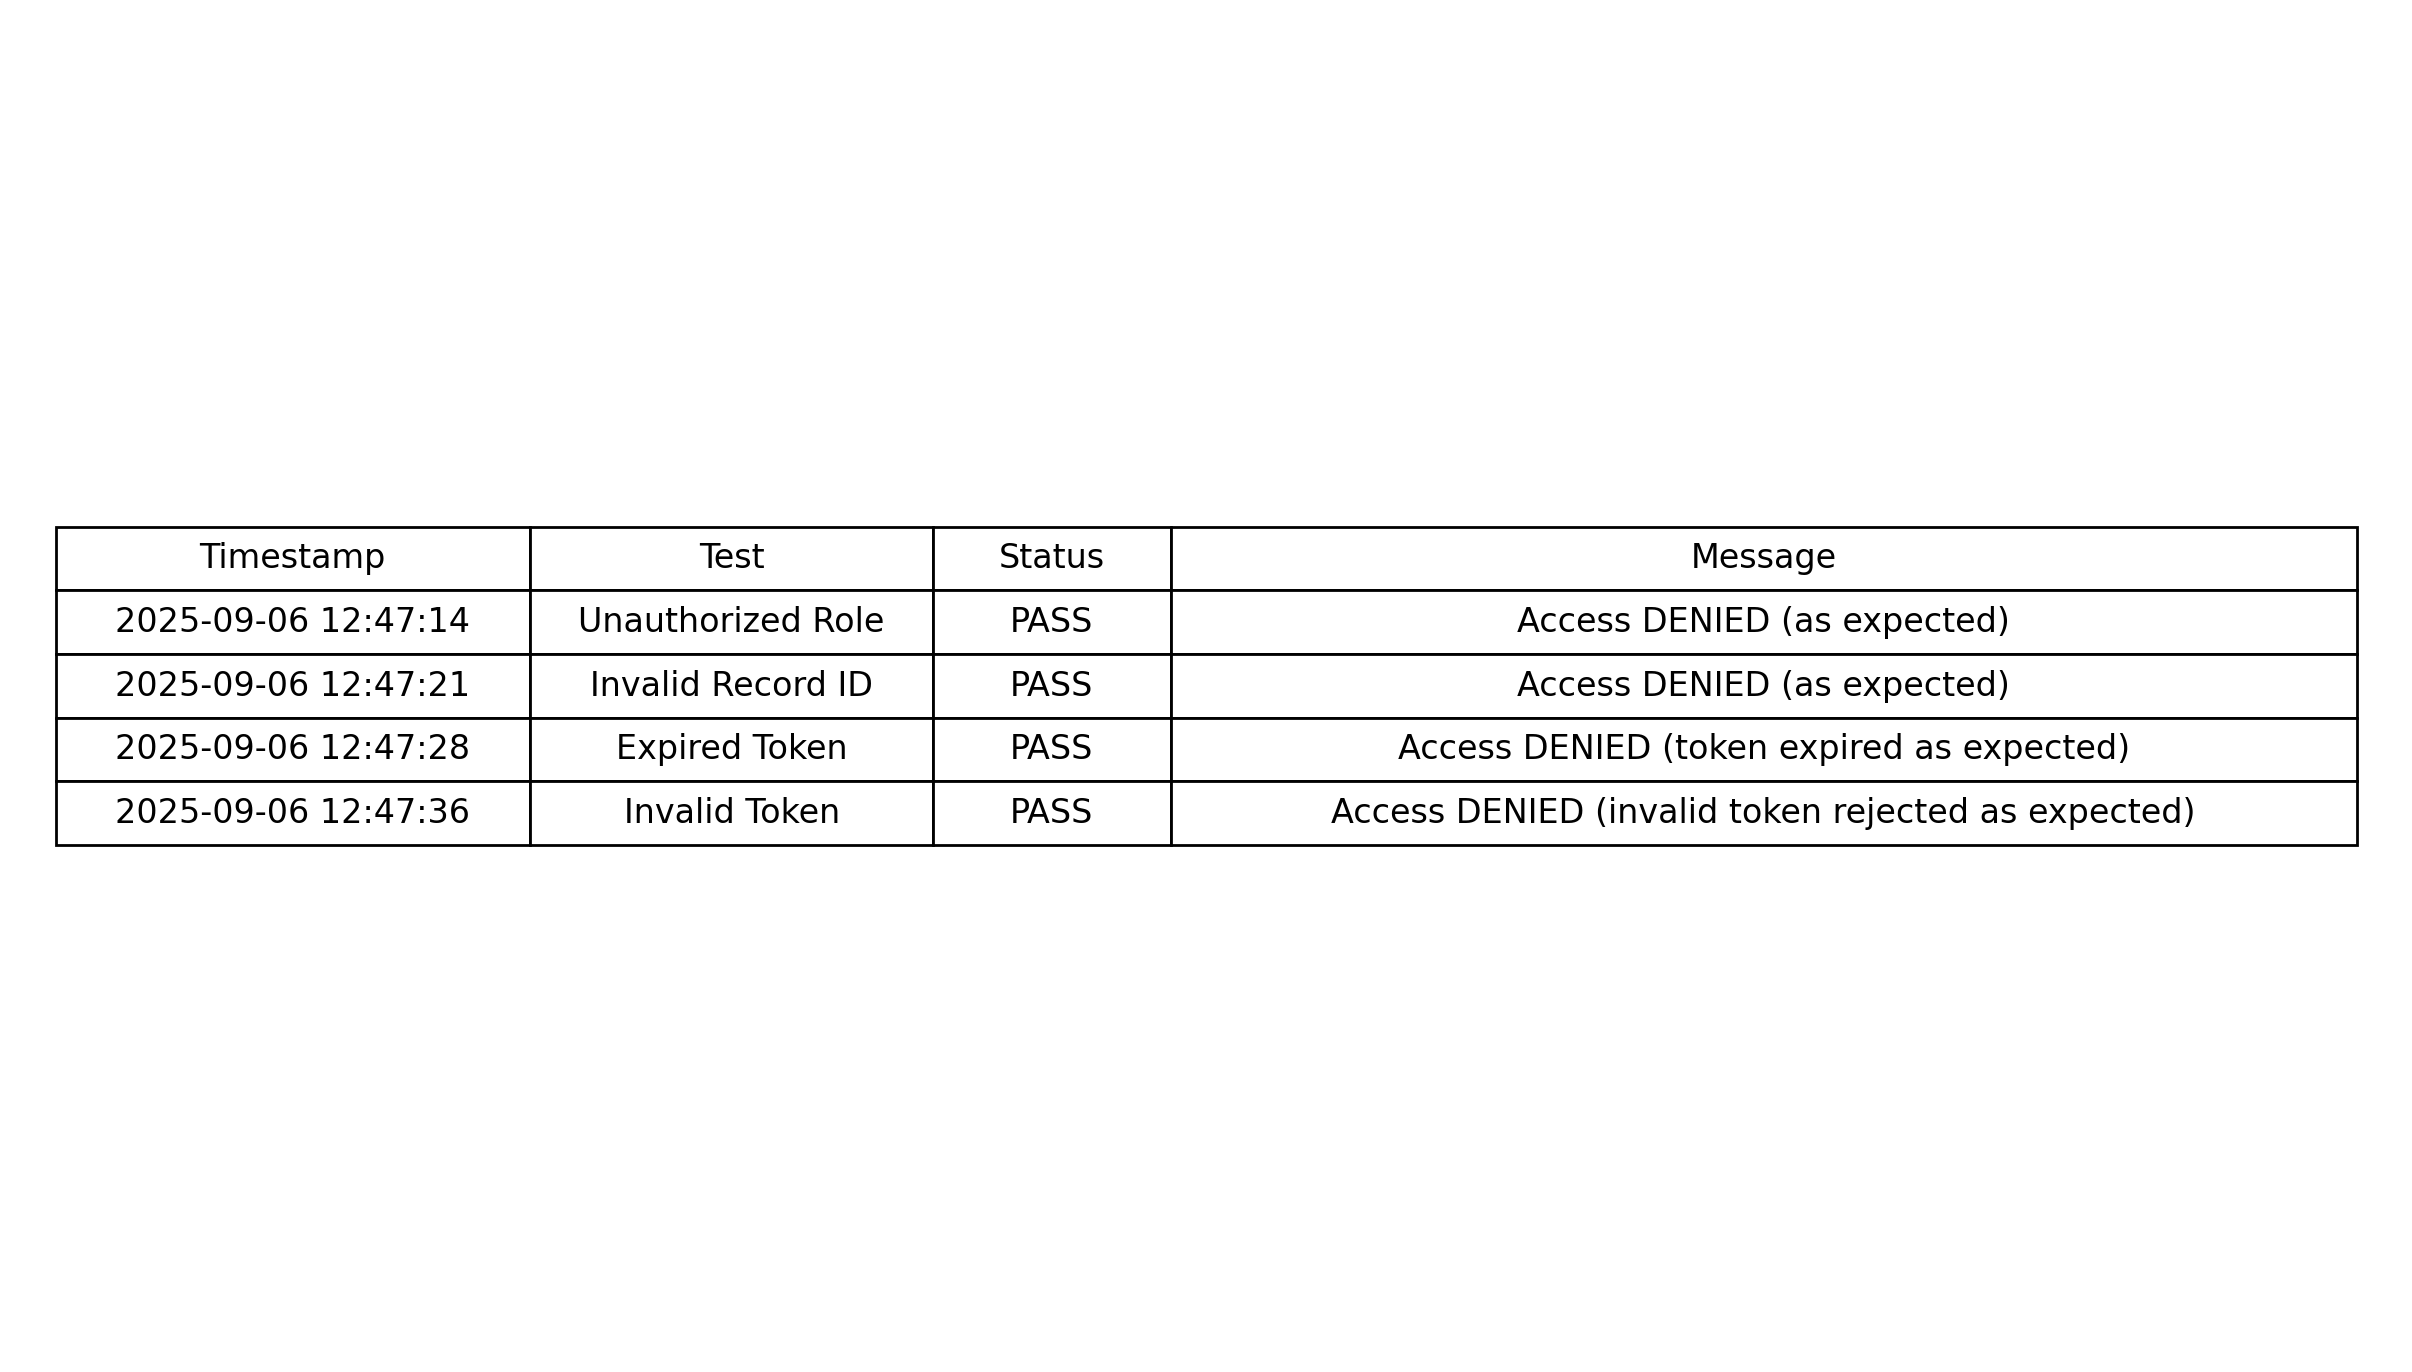

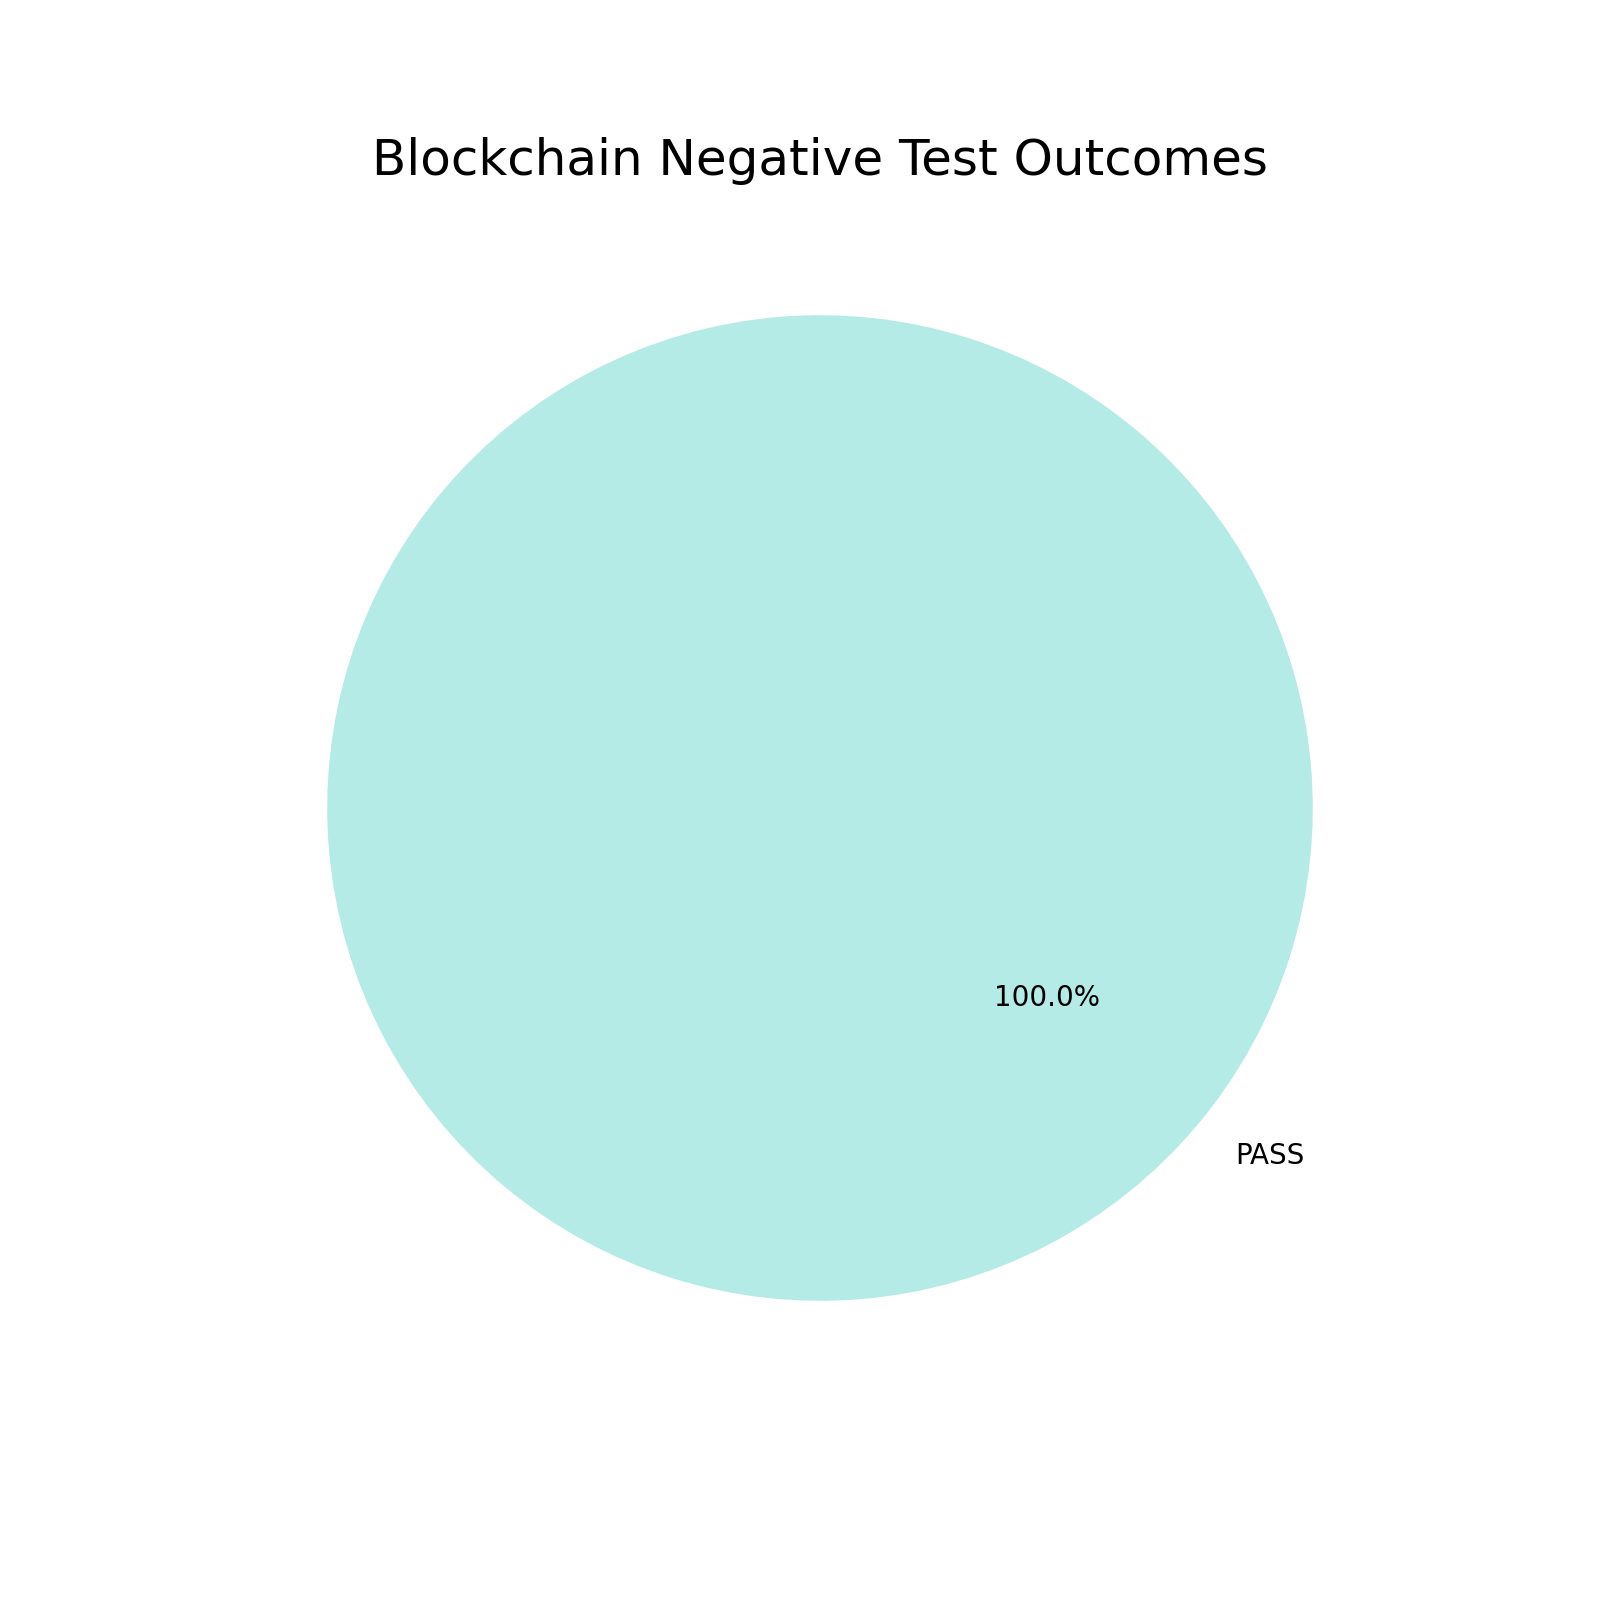

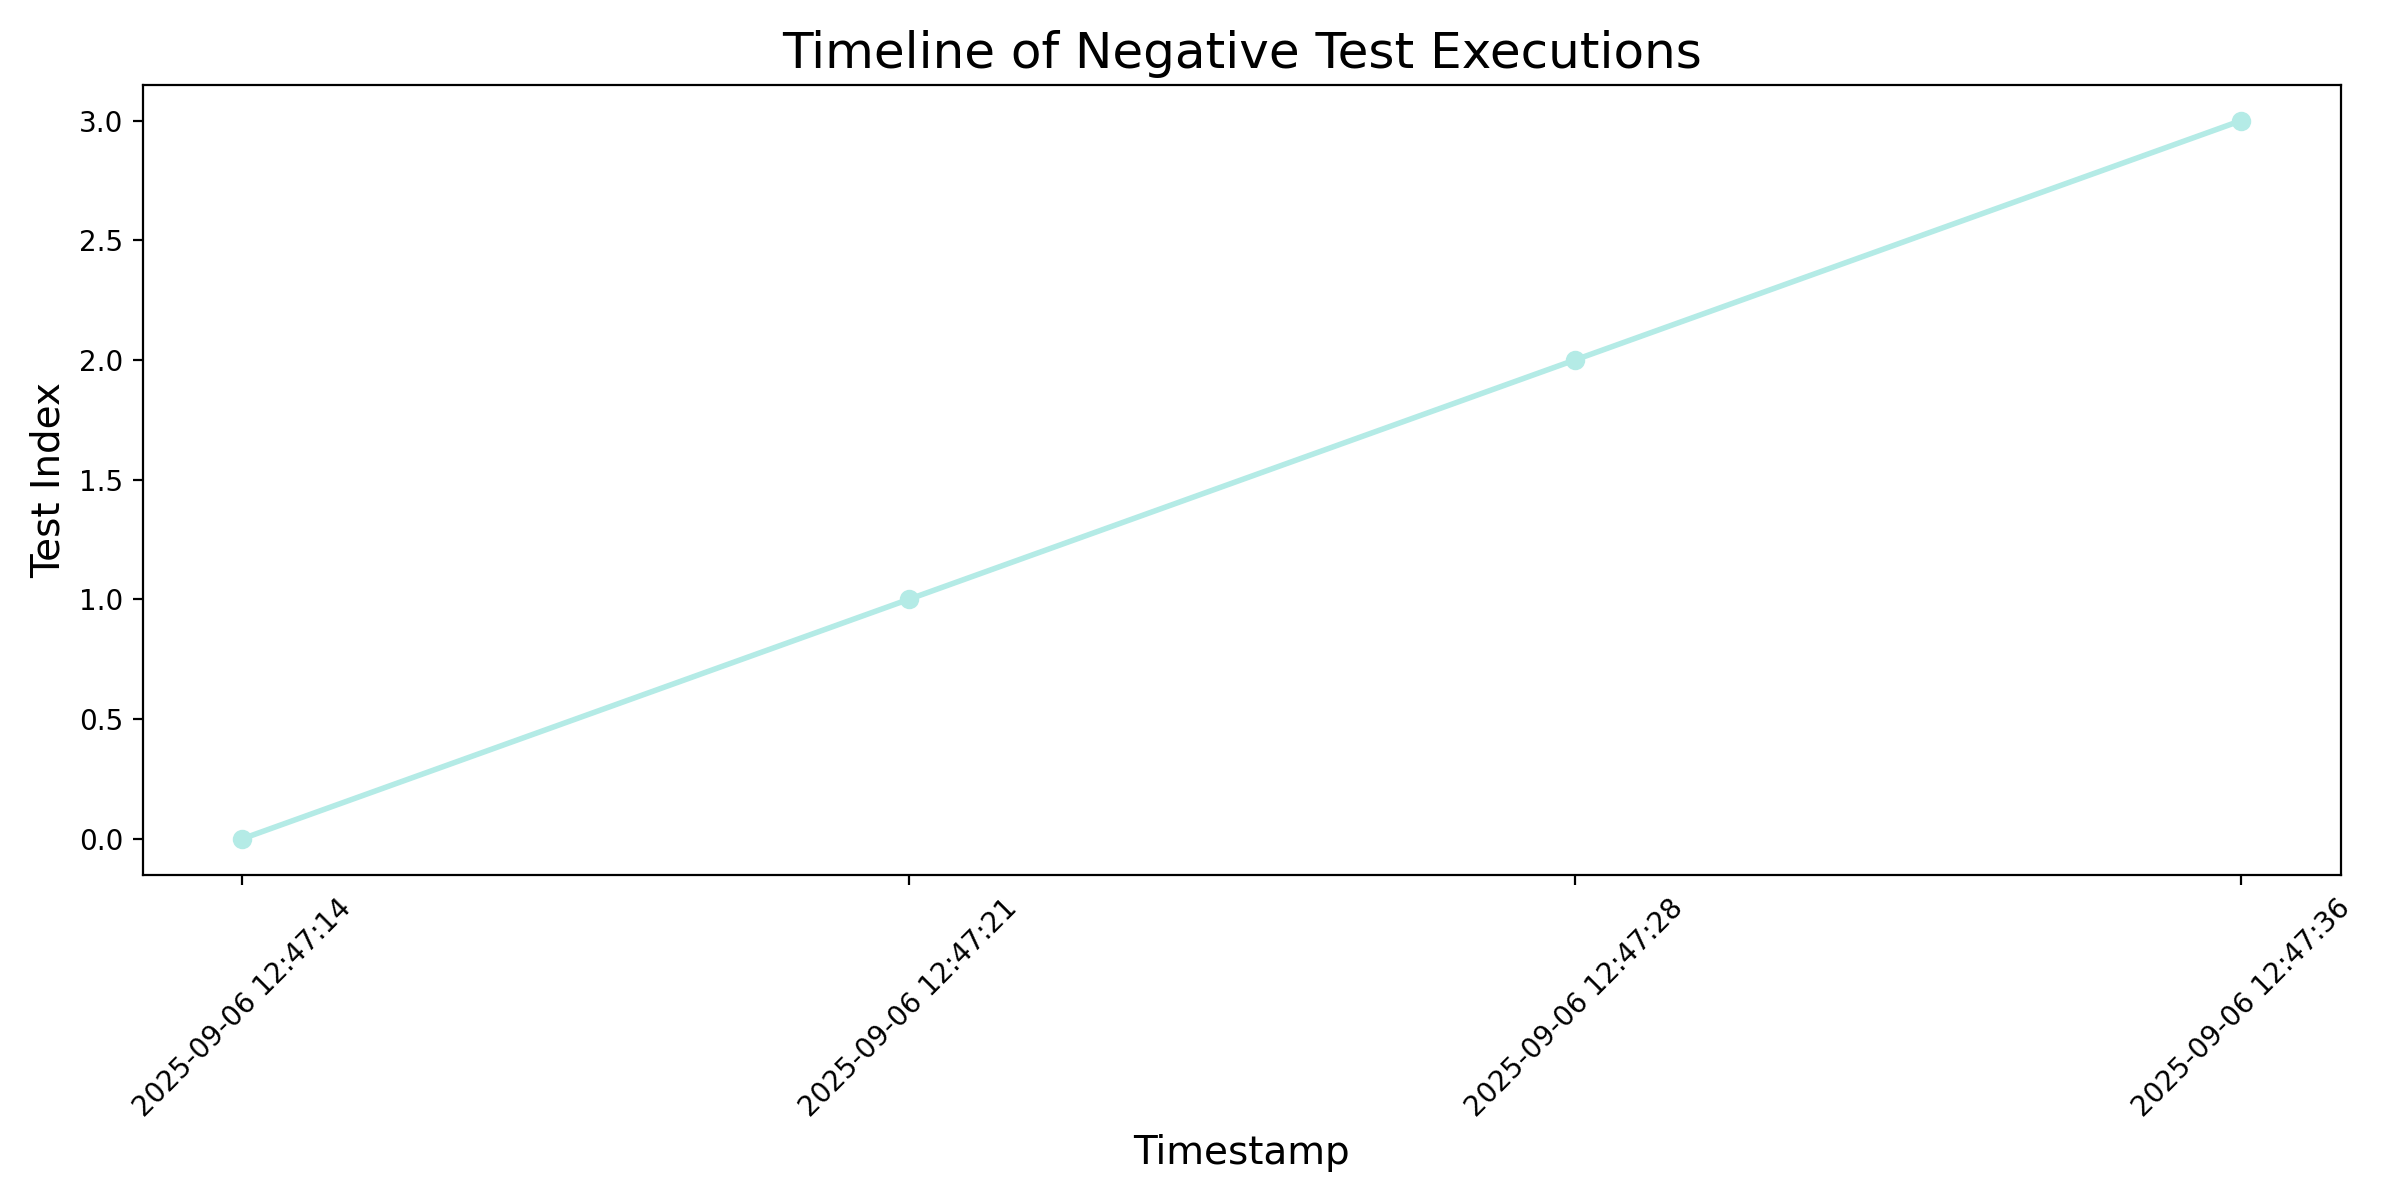


Outputs saved in 'validation_outputs/' folder:
- negative_tests_results.csv
- results_table.png
- status_summary_pie.png
- test_timeline.png


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time
import os
from IPython.display import Image, display

# Ensure output folder exists
os.makedirs("validation_outputs", exist_ok=True)

print("\n--- BLOCKCHAIN NEGATIVE TEST CASES ---")

# Prepare log storage
results = []

# Helper to log test outcomes
def log_result(test_name, status, message):
    results.append({
        "Timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "Test": test_name,
        "Status": status,
        "Message": message
    })

# ------------------------
# TEST 1: Unauthorized Role
# ------------------------
print("\n[TEST 1] Unauthorized Role Access")
unauthorized_role = input("Enter unauthorized role (default 'nurse1'): ").strip() or "nurse1"
try:
    fake_token = create_consent_token(patient_id, record_id, ["Doctor"], expiry_seconds=600)
    nurse_ok = request_access(node_id=access_node, requester_id=unauthorized_role,
                              record_id=record_id, consent_token=fake_token)
    status = "PASS" if not nurse_ok else "FAIL"
    message = "Access DENIED (as expected)" if not nurse_ok else "Access was wrongly GRANTED"
    print(message)
    log_result("Unauthorized Role", status, message)
except Exception as e:
    log_result("Unauthorized Role", "PASS", f"Exception caught: {e}")
    print(f"Error caught (nurse): {e}")

# ------------------------
# TEST 2: Invalid Record ID
# ------------------------
print("\n[TEST 2] Invalid Record ID")
fake_record_id = input("Enter fake record id (default 'invalid_record_9999'): ").strip() or "invalid_record_9999"
try:
    doctor_ok = request_access(node_id=access_node, requester_id=doctor_id,
                               record_id=fake_record_id, consent_token=new_token)
    status = "PASS" if not doctor_ok else "FAIL"
    message = "Access DENIED (as expected)" if not doctor_ok else "Access was wrongly GRANTED"
    print(message)
    log_result("Invalid Record ID", status, message)
except Exception as e:
    log_result("Invalid Record ID", "PASS", f"Exception caught: {e}")
    print(f"Error caught (invalid record): {e}")

# ------------------------
# TEST 3: Expired Token
# ------------------------
print("\n[TEST 3] Expired Token")
try:
    expiry_seconds = int(input("Enter expiry time in seconds (default 1): ") or 1)
    expired_token = create_consent_token(patient_id, record_id, ["Doctor"], expiry_seconds=expiry_seconds)
    print("Waiting for token to expire...")
    time.sleep(expiry_seconds + 1)
    expired_ok = request_access(node_id=access_node, requester_id=doctor_id,
                                record_id=record_id, consent_token=expired_token)
    status = "PASS" if not expired_ok else "FAIL"
    message = "Access DENIED (token expired as expected)" if not expired_ok else "Access wrongly GRANTED"
    print(message)
    log_result("Expired Token", status, message)
except Exception as e:
    log_result("Expired Token", "PASS", f"Exception caught: {e}")
    print(f"Error caught (expired): {e}")

# ------------------------
# TEST 4: Invalid Token Format
# ------------------------
print("\n[TEST 4] Invalid Token Format")
invalid_token = input("Enter fake token (default 'FAKE_TOKEN_12345'): ").strip() or "FAKE_TOKEN_12345"
try:
    fake_ok = request_access(node_id=access_node, requester_id=doctor_id,
                             record_id=record_id, consent_token=invalid_token)
    status = "PASS" if not fake_ok else "FAIL"
    message = "Access DENIED (invalid token rejected as expected)" if not fake_ok else "Access wrongly GRANTED"
    print(message)
    log_result("Invalid Token", status, message)
except Exception as e:
    log_result("Invalid Token", "PASS", f"Exception caught: {e}")
    print(f"Error caught (invalid token): {e}")

# ------------------------
# Save results as CSV
# ------------------------
df = pd.DataFrame(results)
csv_path = "validation_outputs/negative_tests_results.csv"
df.to_csv(csv_path, index=False)
print(f"\nResults saved to: {csv_path}")

# ------------------------
# Save results table as large but compact image
# ------------------------
table_path = "validation_outputs/results_table.png"
fig, ax = plt.subplots(figsize=(12, len(df) * 1.2 + 2))  # Compact width but keeps height
ax.axis('off')
ax.axis('tight')

# Create table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Adjust text size and scaling for balanced look
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 1.5)  # Compact horizontal stretch, better readability vertically

# Custom column widths: Timestamp, Test, Status (narrower), Message (wider)
col_widths = {
    0: 0.20,  # Timestamp
    1: 0.17,  # Test
    2: 0.10,  # Status
    3: 0.50   # Message
}

for col_idx, width in col_widths.items():
    for row in range(len(df) + 1):  # +1 includes header row
        table[(row, col_idx)].set_width(width)


# Reduce space around the table
plt.tight_layout(pad=0.5)

# Save table image with tight bounding box
plt.savefig(table_path, bbox_inches='tight', dpi=200)
plt.close()
display(Image(table_path))

# ------------------------
# Generate Graphs as Images
# ------------------------

# 1. Status summary pie chart
status_counts = df['Status'].value_counts()
pie_path = "validation_outputs/status_summary_pie.png"
plt.figure(figsize=(8, 8))
colors = ['#B4EBE6'] * len(status_counts)  # Set color for each pie slice
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors)
plt.title("Blockchain Negative Test Outcomes", fontsize=18)
plt.savefig(pie_path, dpi=200)
plt.close()
display(Image(pie_path))

# 2. Timeline of test executions
timeline_path = "validation_outputs/test_timeline.png"
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], range(len(df)), marker='o', linewidth=2, color='#B4EBE6')  # Set line and marker color
plt.title("Timeline of Negative Test Executions", fontsize=18)
plt.xlabel("Timestamp", fontsize=14)
plt.ylabel("Test Index", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(timeline_path, dpi=200)
plt.close()
display(Image(timeline_path))

print("\nOutputs saved in 'validation_outputs/' folder:")
print("- negative_tests_results.csv")
print("- results_table.png")
print("- status_summary_pie.png")
print("- test_timeline.png")
